In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#importing csv files
data=pd.read_csv(r'C:/Users/SYS1/Downloads/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are different columns in the dataset some are of categorical type and some are of continous type.The dependent variable is loan status weather the applied applicant got the approval or not.Using the independent variable we need to predict the dependent variable status.

In [3]:
#checking for the shape of the data
data.shape

(614, 13)

There are total 614 rows and 13 columns in the dataset

In [4]:
#Checking for Null method
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in the some of the columns which are need to replaced by using mean,mode or median based on the type of data.Will see in the data preprocessing after checking the visualisation of data.

In [5]:
#checking for info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Most of our dataset includes string columns only few are float type and one is of integer type.

In [6]:
#checking for Stats
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From stats the applicants mean income is 5403,the minimum income of the applicants is 150,the max income is 81000.In the same for the remaining columns has there mean,minimum,maximum values of there particular independent variable.The stats only gives the information about continous data columns not about the categorical columns information.

In [7]:
#Filling the null values for numerical columns using mean method
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [8]:
#Filling the null values for categorical columns using mode method
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [9]:
#Checking for Null method
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data['ApplicantIncome']=data['ApplicantIncome'].astype(float)

In [11]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [12]:
#Dropping the columns which are not required
data.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  TotalIncome        614 non-null    float64
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [14]:
#checking for unique values in dataset
data.apply(lambda x: len(x.unique()))

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
TotalIncome          554
dtype: int64

In [15]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [16]:
#checking for value counts for all the columns
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

There are more male candidates who applied for the loan compared to female

In [17]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

The people who applied for the loan are married, very few are unmarried

In [18]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

The Dependents tells about the person who applied for the loan has any dependent are not 0 tells there is no dependent,1 tells there is one dependent,same as but there is 3+ thats means 3 or more members as dependent

In [19]:
#replacing 3+ with 4 because the + sign may disturb our model for predicting since it is a operator
data=data.replace(to_replace='3+',value=4)

In [20]:
data['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [21]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

The people who applied for the loan are educated most of them are graduated.

In [22]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

most of them are not self employed only few are self employed either they may running there own business.

In [24]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

The credit history tells weather a person who took loan in past weather a person cleared are still he kept pending.Our dataset tells most of them cleared in time.

In [25]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

The people who applied for the loan has kept there property as proof which are in different areas.

In [26]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The status tells the loan is approved for many of the people who applied for the loan

In [27]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
#checking for the categorical variables
cat_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [29]:
#checking for the categorical variables
num_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome']


<AxesSubplot:xlabel='Gender', ylabel='count'>

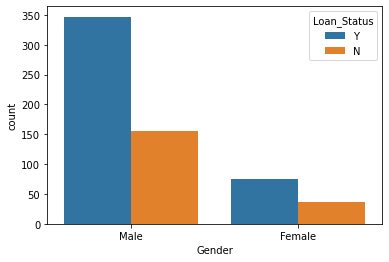

In [30]:
#Visualisation Techniques
#Checking the relation between Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=data)

The male who have applied for the loan they got approved more compared to the female

<AxesSubplot:xlabel='Married', ylabel='count'>

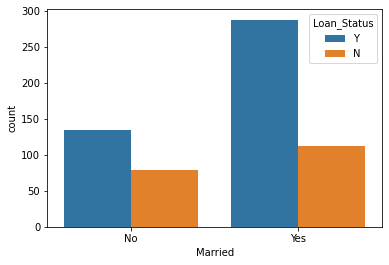

In [31]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

The married people loan status is approved more compared to the unmarried people loan status

<AxesSubplot:xlabel='Dependents', ylabel='count'>

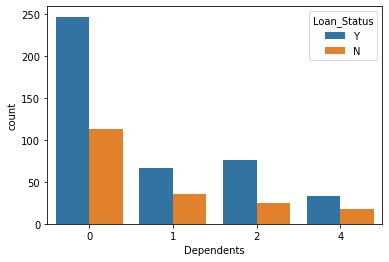

In [32]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

The people with no dependents loan is approved more compared to 1 or more dependents

<AxesSubplot:xlabel='Education', ylabel='count'>

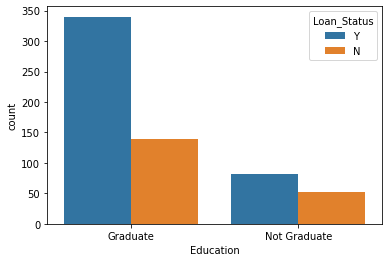

In [33]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

The people who completed there graduation got the loan approval compared to under graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

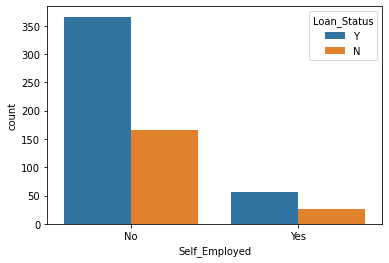

In [34]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

The people who are not self employed which means either they working in public sector private sectors there loan was approved compared to the people who are self employed which means either they are running their business.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

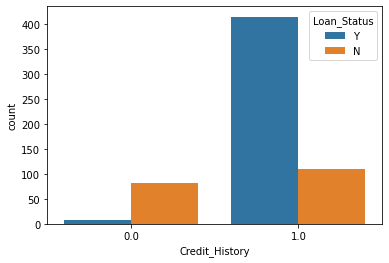

In [35]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=data)

The people with good credit history got the loan approval which means in the past they have cleared thir loans in time.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

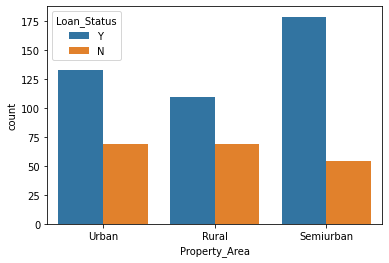

In [36]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

The property belongs to semiurban area has more chance of getting the loan approved

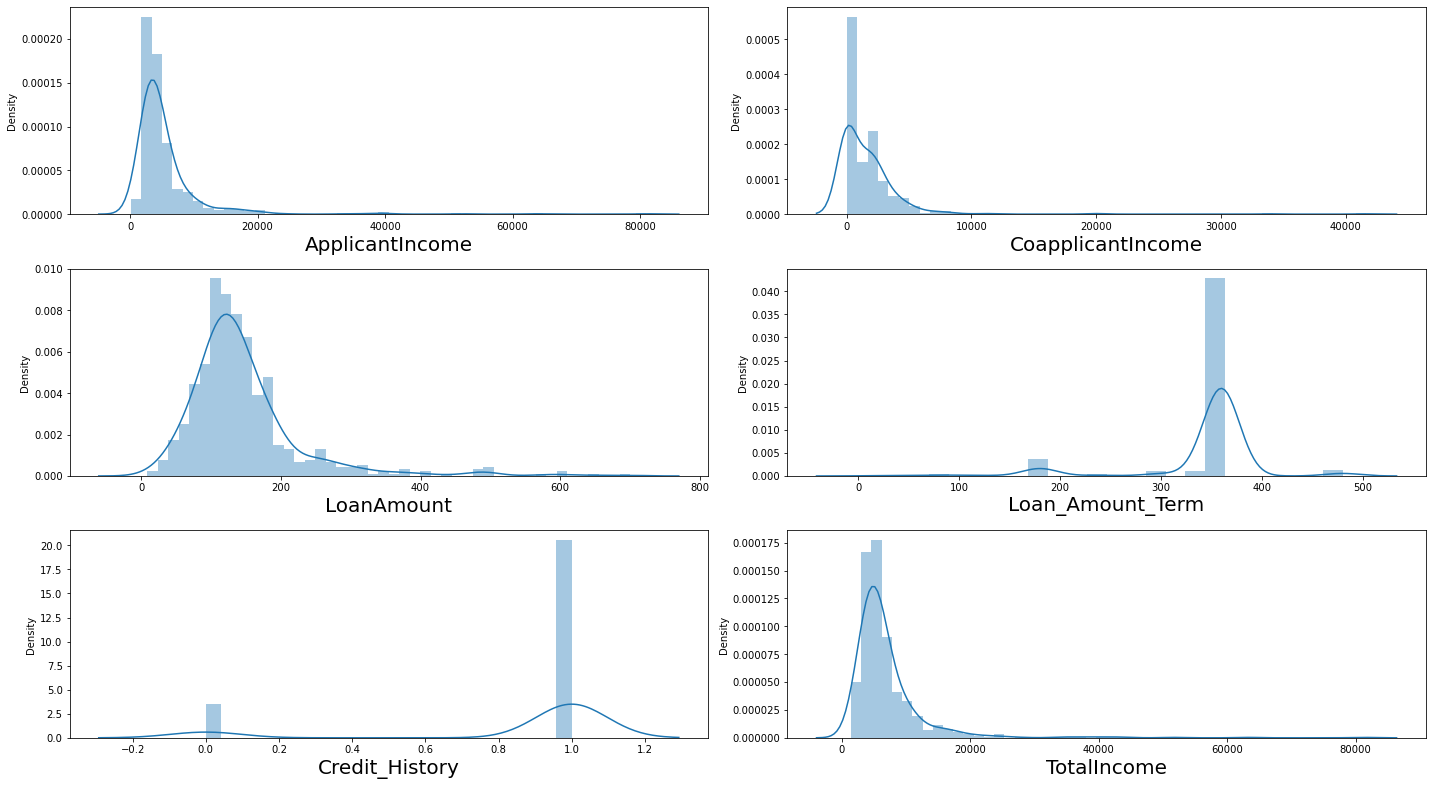

In [37]:
#Now lets plot dist plot and visualise how the data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [38]:
data['ApplicantIncome']=np.log(1+data['ApplicantIncome'])
data['CoapplicantIncome']=np.log(1+data['CoapplicantIncome'])
data['LoanAmount']=np.log(1+data['LoanAmount'])
data['Loan_Amount_Term']=np.log(1+data['Loan_Amount_Term'])
data['TotalIncome']=np.log(1+data['TotalIncome'])

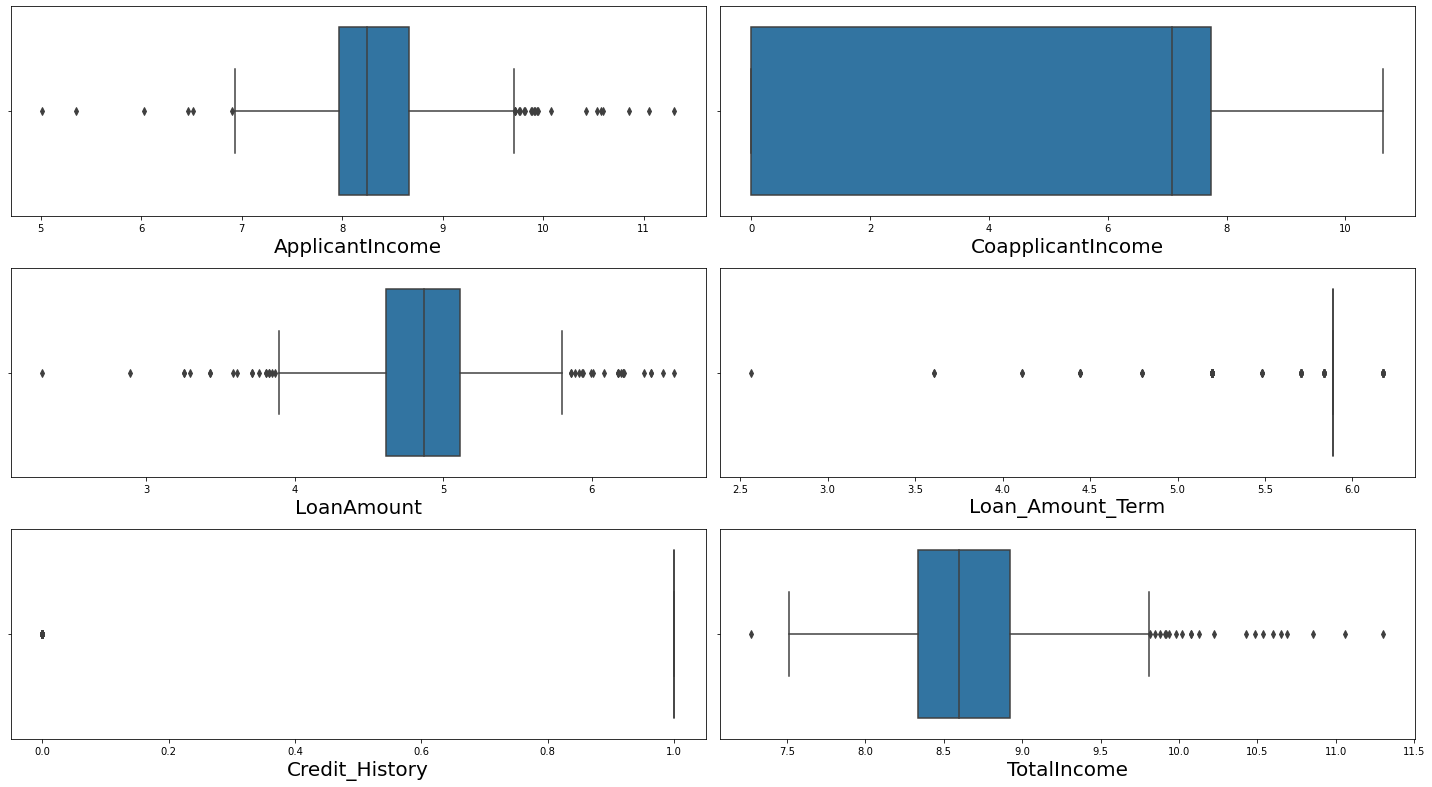

In [39]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are many outliers in the dataset at maximum point.It means the data is not normal.Lets use z score method to remove the outliers.

In [40]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[0.51618627 1.10778298 0.2492193  0.26994076 0.41173269 0.00842583]
 [0.13780585 0.78215757 0.02252523 0.26994076 0.41173269 0.08285992]
 [0.51947937 1.10778298 1.35684624 0.26994076 0.41173269 1.21729867]
 ...
 [1.01592074 0.30848337 1.3574234  0.26994076 0.41173269 0.65366363]
 [0.91897195 1.10778298 0.74457835 0.26994076 0.41173269 0.48512821]
 [0.13780585 1.10778298 0.0549274  0.26994076 2.42876026 0.43939259]]


In [41]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [ 14  14  68  94  94 130 133 133 155 155 155 171 171 171 183 183 185 185
 216 242 262 313 333 333 369 409 409 443 443 468 495 497 546 555 561 568
 575 581 585 600 600]


In [42]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data.drop(data.index[index])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,1.0,Urban,Y,8.674197
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural,N,8.714732
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban,Y,8.006701
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban,Y,8.505525
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban,Y,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,5.888878,1.0,Rural,Y,7.972811
610,Male,Yes,4,Graduate,No,8.320448,0.000000,3.713572,5.198497,1.0,Rural,Y,8.320448
611,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,5.888878,1.0,Urban,Y,9.025576
612,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,5.888878,1.0,Urban,Y,8.933796


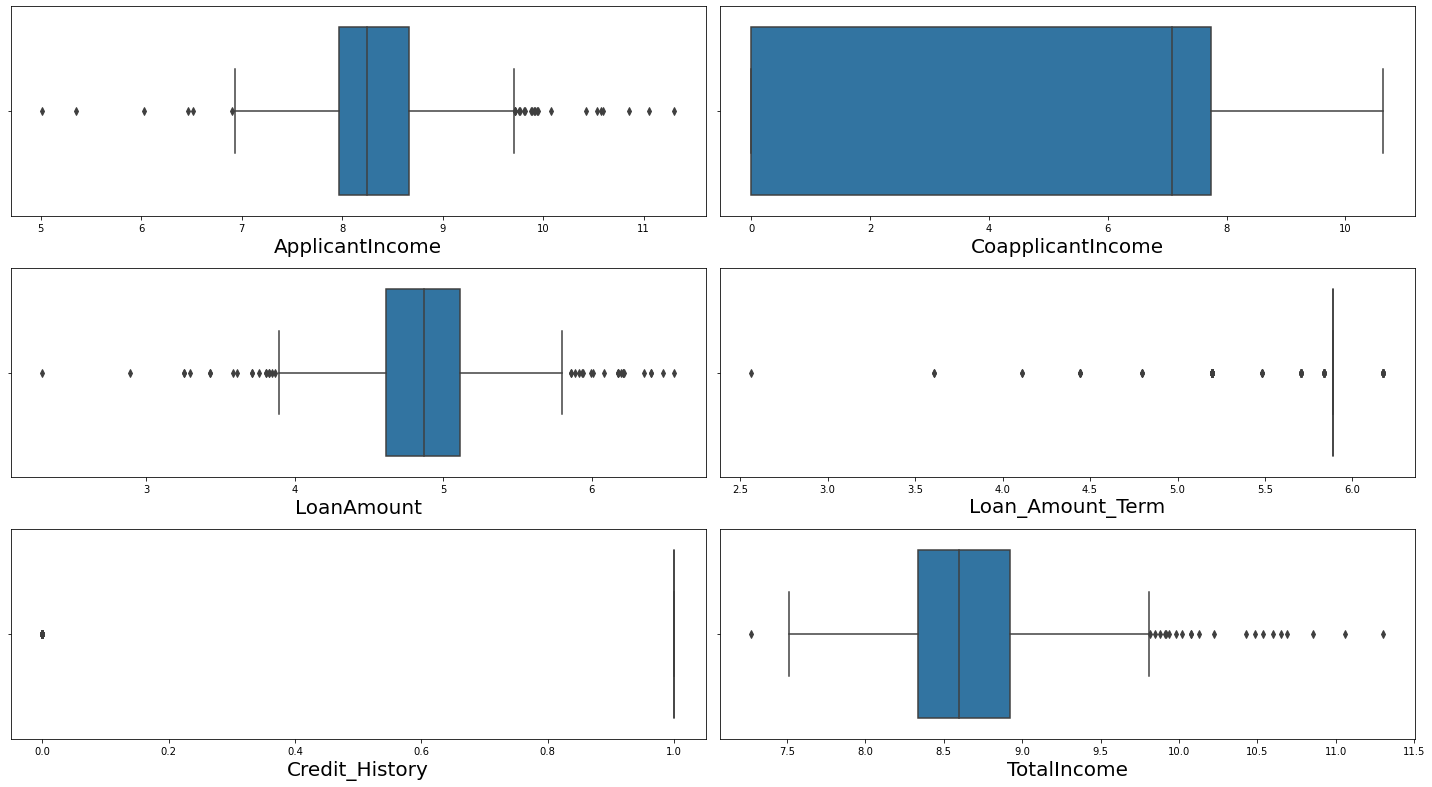

In [43]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [44]:
data.skew()

Dependents           1.456965
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -4.800667
Credit_History      -2.021971
TotalIncome          1.077048
dtype: float64

In [45]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_col:
    data[col]=lab_enc.fit_transform(data[col])

In [47]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674197,0.000000,4.993232,5.888878,1.0,2,1,8.674197
1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,1.0,0,0,8.714732
2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,1.0,2,1,8.006701
3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,1.0,2,1,8.505525
4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,1.0,2,1,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,5.888878,1.0,0,1,7.972811
610,1,1,4,0,0,8.320448,0.000000,3.713572,5.198497,1.0,0,1,8.320448
611,1,1,1,0,0,8.996280,5.484797,5.537334,5.888878,1.0,2,1,9.025576
612,1,1,2,0,0,8.933796,0.000000,5.236442,5.888878,1.0,2,1,8.933796


In [48]:
#Count value for label
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

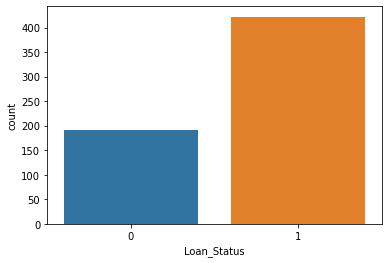

In [49]:
#Count plot for label
sns.countplot(data['Loan_Status'])

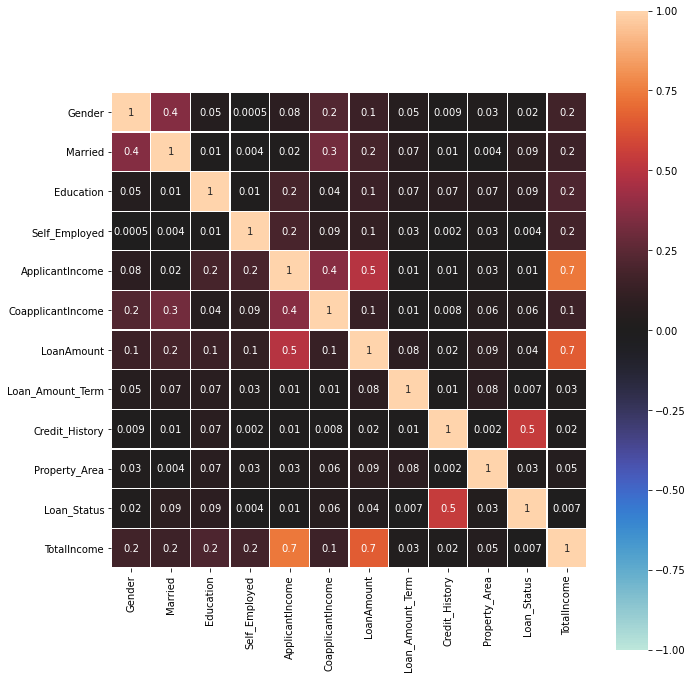

In [50]:
#lets plot heat map to find the multicollinearty with the features
df_corr=data.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

Loan_status is highly correlated with credit history very less correlated with self employed.Loan status is also correlated with credit history,loan amount is 40% correlated with applicant income.

In [51]:
#separating the feature and label columns
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  TotalIncome        614 non-null    float64
dtypes: float64(6), int32(5), object(1)
memory usage: 45.7+ KB


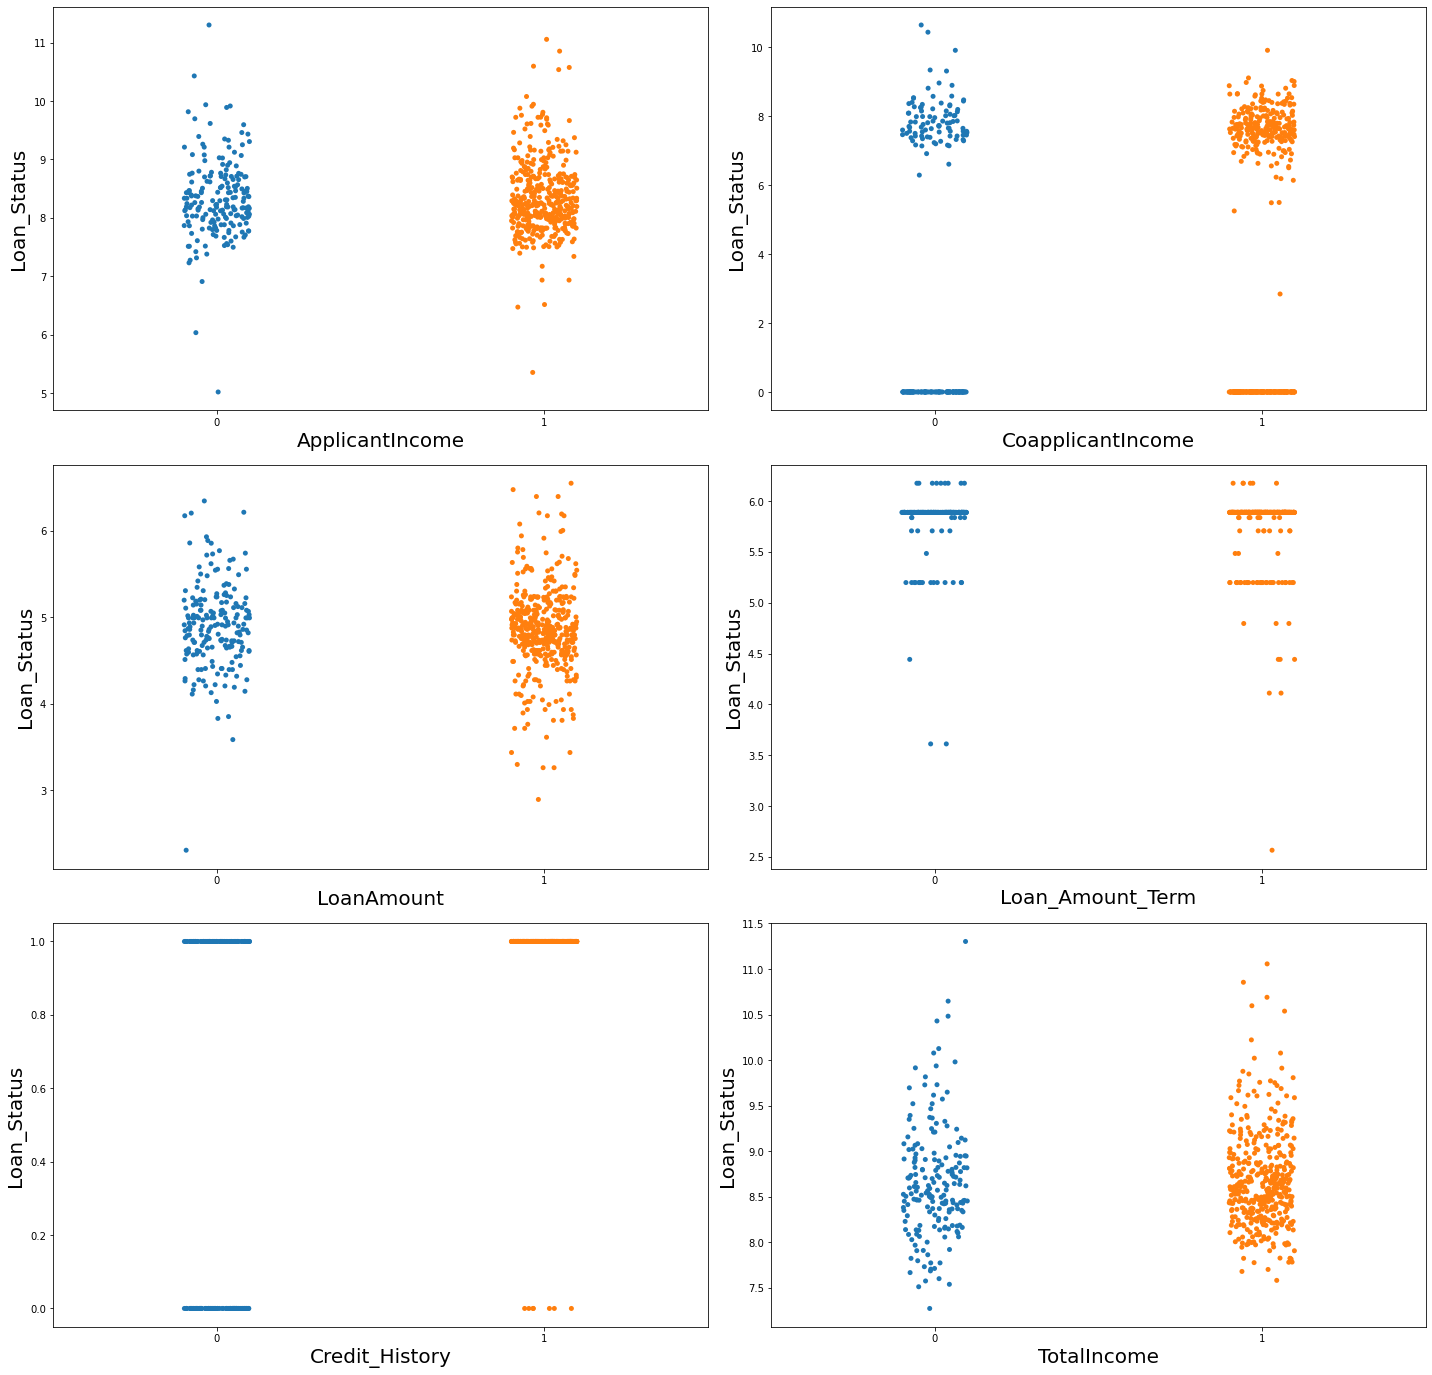

In [53]:
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.stripplot(y,data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan_Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1.The strip plot says if the dependents are less there is more chance of getting the loan.As the dependents for the person increases the low of loan approval. 2.As the applicant income is more then he or she has more chance of loan approval.The person who has 8000 t0 10000 dollars of income he has more chance of loan approval. 3.If the coapplicant income is between 7000 to 8000 dollars then the person who applied for the loan has more chance of loan approval. 4.If a person is applied for a loan amount of between 4 to 6 k dollars of amount then he or she has more chance of approval of loan. 5.If the loan amount term is less then there is high chance of loan approval.Because the loan will be taken for a period of time if the time is less then the person can get the loan. 6.If a person has good credit history then he or she is sanctioned with the loan in gthe past if they pay their loan terms clearly with in time then there is high possibility of getting loan. 7.If the persons income with his or her dependents income is between 8 to 9 dollars then the person has high chance of getting the loan.

In [54]:
x.shape

(614, 12)

In [55]:
#scailing some of the columns because of the continous data in the columns
from sklearn.preprocessing import StandardScaler
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','TotalIncome']
for col in cols:     
    scaler = StandardScaler()     
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,0.516186,-1.107783,0.249219,0.269941,1.0,2,0.008426
1,1,1,1,0,0,0.137806,0.782158,-0.022525,0.269941,1.0,0,0.082860
2,1,1,0,0,1,-0.519479,-1.107783,-1.356846,0.269941,1.0,2,-1.217299
3,1,1,0,1,0,-0.751605,0.897526,-0.152922,0.269941,1.0,2,-0.301306
4,1,0,0,0,0,0.555727,-1.107783,0.173033,0.269941,1.0,2,0.055223
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.572062,-1.107783,-1.210254,0.269941,1.0,0,-1.279531
610,1,1,4,0,0,-0.032679,-1.107783,-2.357140,-1.962012,1.0,0,-0.641164
611,1,1,1,0,0,1.015921,0.308483,1.357423,0.269941,1.0,2,0.653664
612,1,1,2,0,0,0.918972,-1.107783,0.744578,0.269941,1.0,2,0.485128


In [56]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

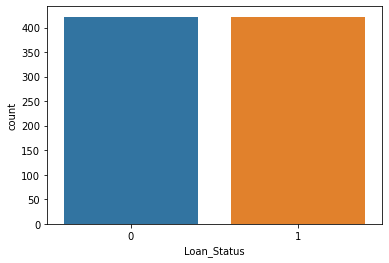

In [57]:
sns.countplot(y_over)

In [58]:
#train test split
#importing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=300)

In [59]:
#Importing some classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [60]:
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

In [61]:
#Lets use Logistic regression algorithm to build our model
#instantiating
lr=LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
#predicting
y_pred_lr=lr.predict(x_test)

In [63]:
lr.score(x_train,y_train)

0.8

In [64]:
#checking the score of our model
lr.score(x_test,y_test)

0.8441558441558441

In [65]:
#Finding the accuracy score
accuracy_score(y_test,y_pred_lr)

0.8441558441558441

In [66]:
#finding cross validation score
np.mean(cross_val_score(lr,x_over,y_over,cv=5))

0.7227599323753171

In [67]:
#instansiating
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn=knn.predict(x_test)

In [69]:
knn.score(x_train,y_train)

0.7978260869565217

In [70]:
accuracy_score(y_test,y_pred_knn)

0.7532467532467533

In [71]:
np.mean(cross_val_score(knn,x_over,y_over,cv=5))

0.7405114116652578

In [72]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.28      0.39        43
           1       0.77      0.94      0.85       111

    accuracy                           0.75       154
   macro avg       0.70      0.61      0.62       154
weighted avg       0.73      0.75      0.72       154



In [73]:
confusion_matrix(y_test,y_pred_knn)

array([[ 12,  31],
       [  7, 104]], dtype=int64)

In [75]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred_dt=dt.predict(x_test)

In [77]:
dt.score(x_train,y_train)

1.0

In [78]:
#score
dt.score(x_test,y_test)

0.7337662337662337

In [79]:
accuracy_score(y_test,y_pred_dt)

0.7337662337662337

In [81]:
#Cross validation score
np.mean(cross_val_score(dt,x_over,y_over,cv=5))

0.7700901662440124

In [82]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        43
           1       0.84      0.77      0.81       111

    accuracy                           0.73       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.75      0.73      0.74       154



In [83]:
#printing confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[27, 16],
       [25, 86]], dtype=int64)

In [84]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_pred_rf=rf.predict(x_test)

In [86]:
rf.score(x_train,y_train)

1.0

In [87]:
accuracy_score(y_test,y_pred_rf)

0.8311688311688312

In [88]:
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.8246759650605805

In [89]:
#Classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.51      0.63        43
           1       0.83      0.95      0.89       111

    accuracy                           0.83       154
   macro avg       0.82      0.73      0.76       154
weighted avg       0.83      0.83      0.82       154



In [90]:
#confusion matrix
confusion_matrix(y_test,y_pred_rf)

array([[ 22,  21],
       [  5, 106]], dtype=int64)

In [91]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [93]:
y_pred_svm=svm.predict(x_test)

Training score

In [95]:
accuracy_score(y_test,y_pred_svm)

0.8506493506493507

In [96]:
np.mean(cross_val_score(svm,x_over,y_over,cv=5))

0.7333896872358411

In [97]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.83      0.99      0.91       111

    accuracy                           0.85       154
   macro avg       0.89      0.74      0.78       154
weighted avg       0.87      0.85      0.83       154



In [98]:
confusion_matrix(y_test,y_pred_svm)

array([[ 21,  22],
       [  1, 110]], dtype=int64)

In [99]:
#Logistic Regression
roc_auc_score(y_test,y_pred_lr)

0.7351770375026189

In [100]:
### KNN
roc_auc_score(y_test,y_pred_knn)

0.6080033521893987

In [102]:
roc_auc_score(y_test,y_pred_dt)

0.7013408757594805

In [103]:
roc_auc_score(y_test,y_pred_rf)

0.7332914309658496

In [104]:
roc_auc_score(y_test,y_pred_rf)

0.7332914309658496

ROC AUC Score is good for Support Vector classifier so our best fit model is svc.

In [105]:
param_grid={
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[100,200],
    'criterion':['gini','entropy']
}

In [106]:
grid_search=GridSearchCV(rf, param_grid,cv=5,n_jobs=-1)

In [107]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200]})

In [108]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [109]:
rf=RandomForestClassifier(criterion='entropy',max_depth=6,max_features='sqrt',n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt')

In [110]:
y_pred_rf=rf.predict(x_test)

In [111]:
accuracy_score(y_test,y_pred_rf)

0.8376623376623377

In [112]:
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.7689701324316708

In [113]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63        43
           1       0.83      0.97      0.90       111

    accuracy                           0.84       154
   macro avg       0.85      0.73      0.76       154
weighted avg       0.84      0.84      0.82       154



In [114]:
confusion_matrix(y_test,y_pred_rf)

array([[ 21,  22],
       [  3, 108]], dtype=int64)

In [115]:
auc=roc_auc_score(y_test,y_pred_rf)
auc

0.7306725329981144

In [116]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_rf)
fpr

array([0.        , 0.51162791, 1.        ])



tpr

thresholds


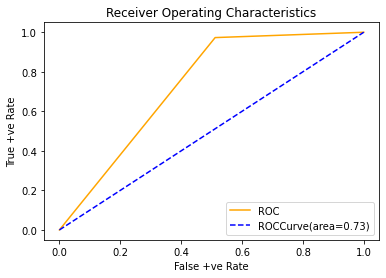

In [117]:


plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCCurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()



By using Random forest classifier we can achieve 74% area and the accuracy and cross validation is also good for our Random forest.

In [118]:
param_grid={'C':[0.001,0.01,0.1],'gamma':[0.1,0.2,0.3,0.4]}

In [119]:
grid_search=GridSearchCV(svm, param_grid,cv=5,n_jobs=-1)

In [120]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1],
                         'gamma': [0.1, 0.2, 0.3, 0.4]})

In [121]:
grid_search.best_params_

{'C': 0.001, 'gamma': 0.1}

In [122]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [123]:
y_pred_svm=svm.predict(x_test)

In [124]:
accuracy_score(y_test,y_pred_svm)

0.8506493506493507

In [125]:
np.mean(cross_val_score(svm,x_over,y_over,cv=5))

0.7333896872358411

In [126]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.83      0.99      0.91       111

    accuracy                           0.85       154
   macro avg       0.89      0.74      0.78       154
weighted avg       0.87      0.85      0.83       154



In [128]:
confusion_matrix(y_test,y_pred_svm)

array([[ 21,  22],
       [  1, 110]], dtype=int64)

In [129]:
auc=roc_auc_score(y_test,y_pred_svm)
auc

0.7396815420071234

In [130]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_svm)
fpr

array([0.        , 0.51162791, 1.        ])

In [131]:
tpr

array([0.        , 0.99099099, 1.        ])

In [132]:
thresholds

array([2, 1, 0])

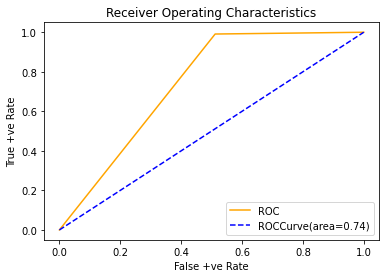

In [133]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCCurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()



By using Support vector classifier we can only achieve 74% of area so it is not good model for our dataset.


In [134]:
import pickle
filename='Loan Application Status.pkl'
pickle.dump(rf,open(filename,'wb'))

Conclusion

In [135]:
a=np.array(y_test)
predicted=np.array(y_pred_rf)
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,0,1
1,0,0
2,0,0
3,1,0
4,1,1
...,...,...
149,1,1
150,1,1
151,1,1
152,1,1


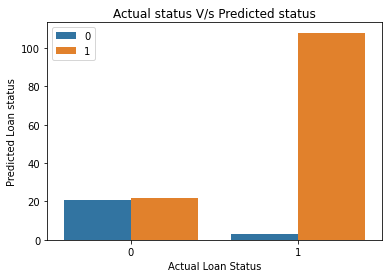

In [136]:
#Curve for actual and predicted value
sns.countplot(x=y_test,hue=y_pred_rf)
plt.xlabel('Actual Loan Status')
plt.ylabel('Predicted Loan status')
plt.title('Actual status V/s Predicted status')
plt.show()

<AxesSubplot:ylabel='count'>

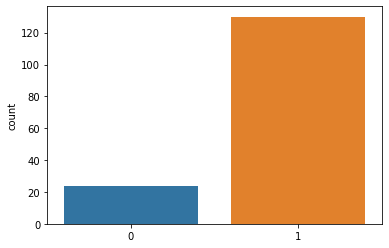

In [137]:
sns.countplot(y_pred_rf)



In our prediction most of the applicants loan is approved based on the features.So both Support vector machine and random forest are giving the good so both the models fits for prediction it is hitting 74% of ROC AUC score and accuracy of 85%.
